In [14]:
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import mean_squared_error

def findMiddle(ls):
    ls.sort()
    for i in range(len(ls)):
        if ls[i] > 0:
            return(i-0.5)
            
def readData(path,gold = False, gather = False): # -> # [[att, count,yGold, yPred]]
    data = []
    with open(path, mode ='r', encoding="UTF-8")as file:
        csvFile = csv.reader(file, delimiter = ";")
        next(csvFile)
        for lines in csvFile:
            if gather:
                data.append([lines[0],int(lines[1])+int(lines[2]),float(lines[6]),float(lines[5])])
            else:
                data.append([lines[0],f"f-{lines[1]}/m-{lines[2]}",float(lines[6]),float(lines[5])])

    if gold:
        data = sorted(data,key = lambda x: x[2]) 
    else:
        data = sorted(data,key = lambda x: x[3]) # sort on bias score low to high
    # data = data[::-1] #same order as census data

    return data

def plotdata(data,name, gold = False):
    atts = [x[0] for x in data]
    counts = [x[1] for x in data]
    yGold = [x[2] for x in data]
    yPred = [x[3] for x in data]
    y_positions = range(len(atts))
    plt.figure(figsize=(10,len(atts) * 0.3))

    if not gold:
        plt.scatter(yPred, y_positions, color='red', label='pred')
        
    plt.scatter(yGold, y_positions, color='green', label='gold')
    
    # # Customize the y-axis to show only labels
    plt.yticks(ticks=y_positions, labels=atts)
    plt.ylim(-1,len(atts))  
    plt.xlim(-1,1)  
    
    # # Add labels, title, and legend
    plt.xlabel('PPBS')
    plt.ylabel('Occupations')
    # plt.title(name)
    plt.title(f"LM: {name} - MSE: {round(mean_squared_error(yGold,yPred),4)}")
    plt.legend()
    
    # grid
    plt.grid()
    plt.axvline(color='black')
    middle = findMiddle(yGold)
    plt.axhline(y=middle, color='black')
    plt.text(0.8,middle + 0.6, f"{round((yPred[int(middle + 0.5)] + yPred[int(middle - 0.5)])/2,3)}")

    for y, att in enumerate(atts):
        plt.text(1.02, y - 0.25, counts[y], fontsize=10)

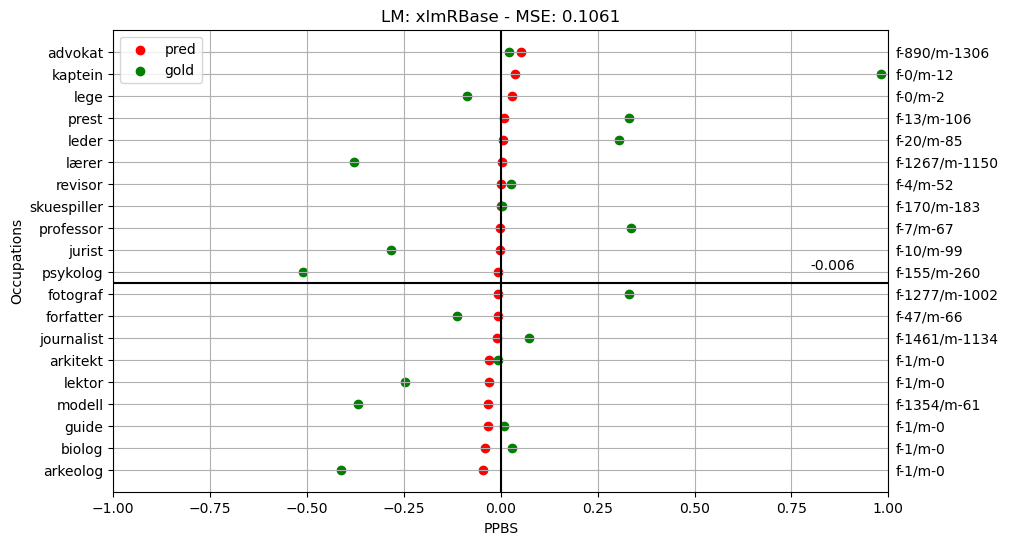

In [2]:
data = readData("data/filtered/xlmRBaseFiltered_occ.csv") # read data from file
plotdata(data, "xlmRBase") # Plot the data
plt.show()

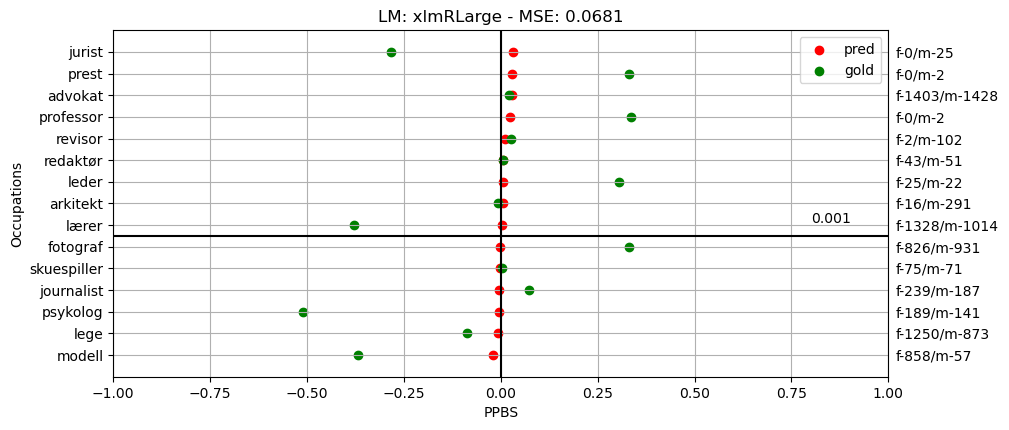

In [25]:
data = readData("data/filtered/xlmRLargeFiltered_occ.csv") # read data from file
plotdata(data, "xlmRLarge") # Plot the data
plt.show()

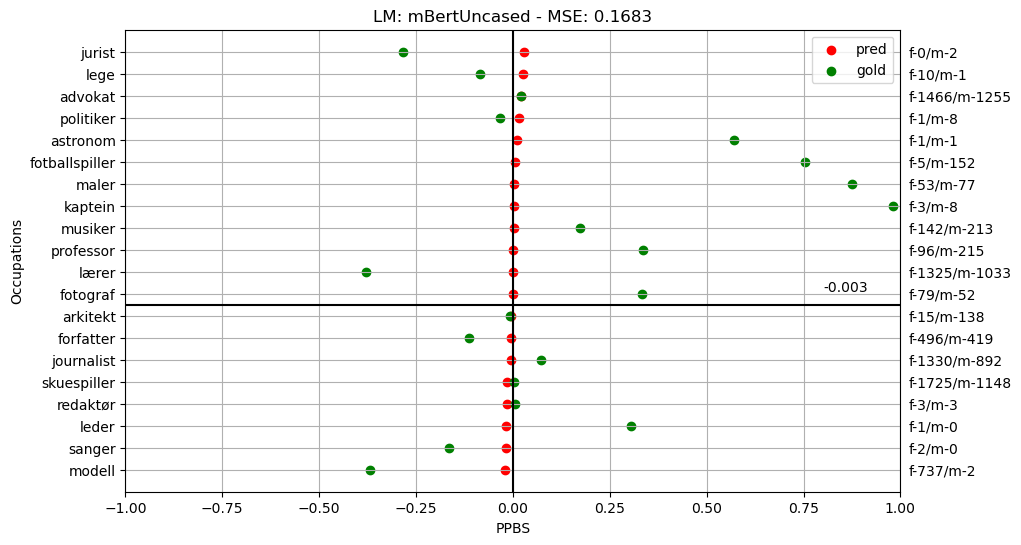

In [26]:
data = readData("data/filtered/mBertUncasedFiltered_occ.csv") # read data from file
plotdata(data, "mBertUncased") # Plot the data
plt.show()

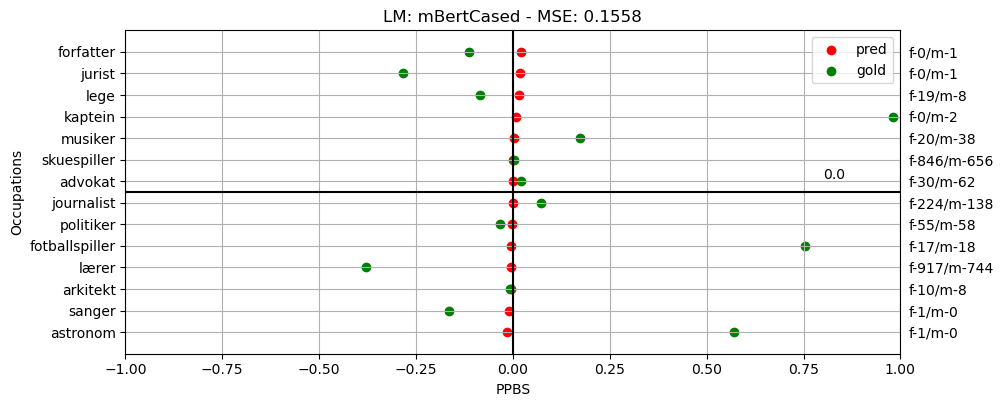

In [27]:
data = readData("data/filtered/mBertCasedFiltered_occ.csv") # read data from file
plotdata(data, "mBertCased") # Plot the data
plt.show()

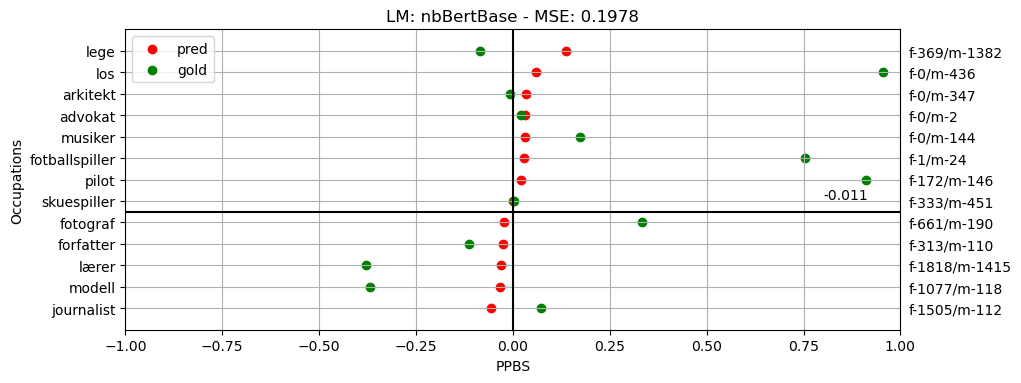

In [28]:
data = readData("data/filtered/nbBertBaseFiltered_occ.csv") # read data from file
plotdata(data, "nbBertBase") # Plot the data
plt.show()

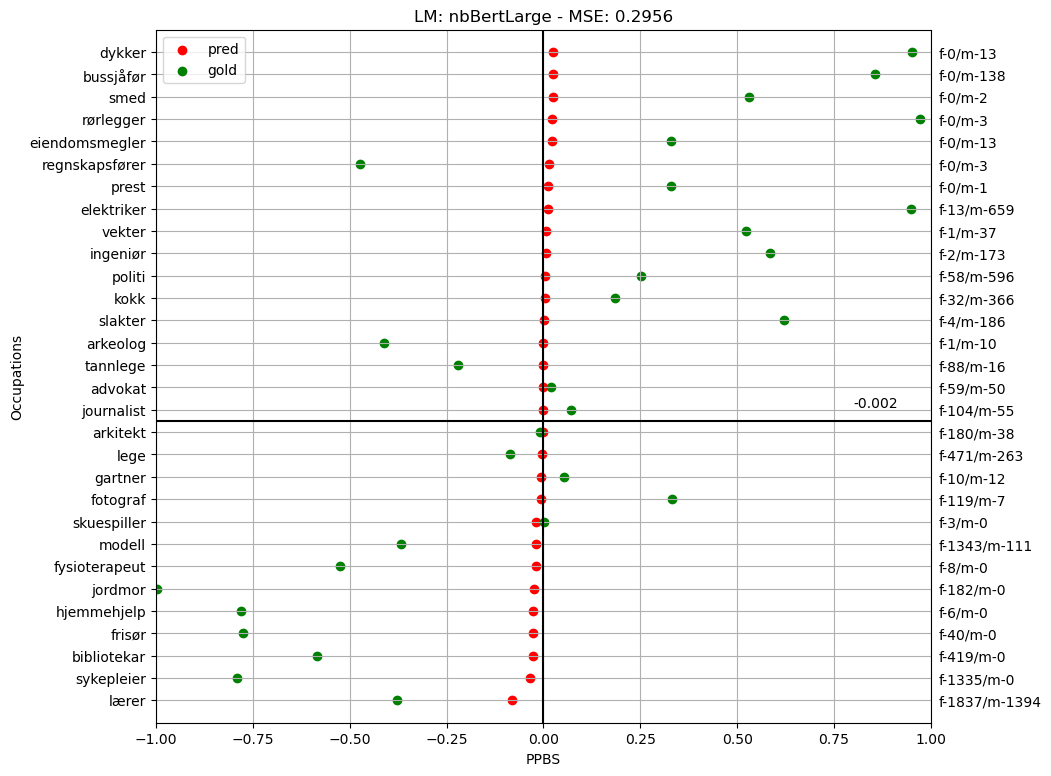

In [29]:
data = readData("data/filtered/nbBertLargeFiltered_occ.csv") # read data from file
plotdata(data, "nbBertLarge") # Plot the data
plt.show()

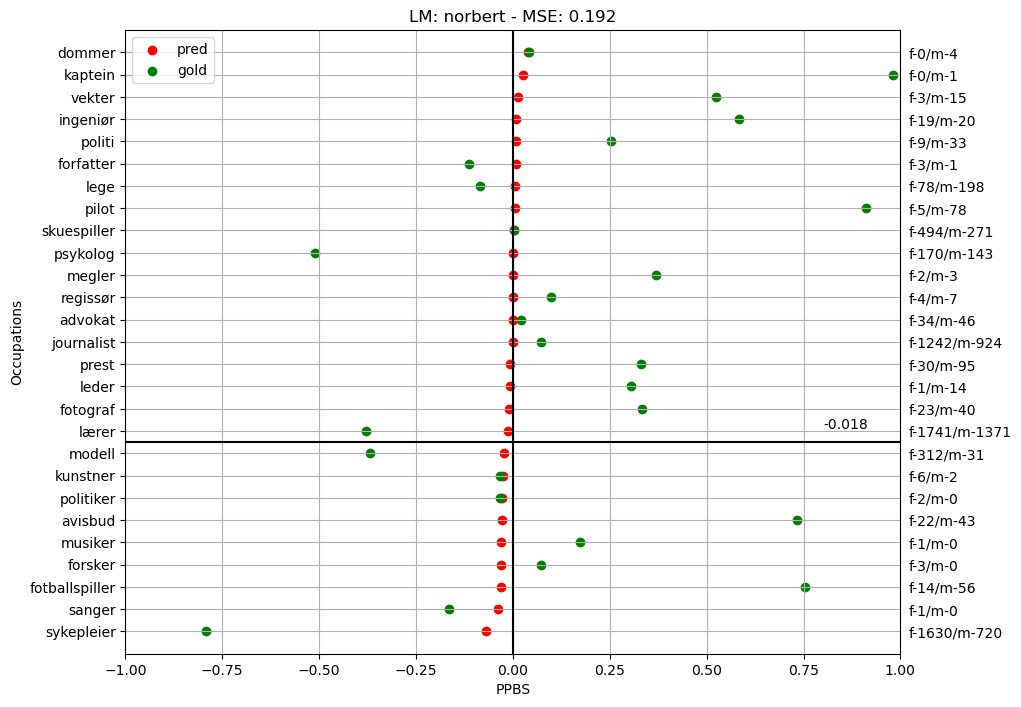

In [30]:
data = readData("data/filtered/norbertFiltered_occ.csv") # read data from file
plotdata(data, "norbert") # Plot the data
plt.show()

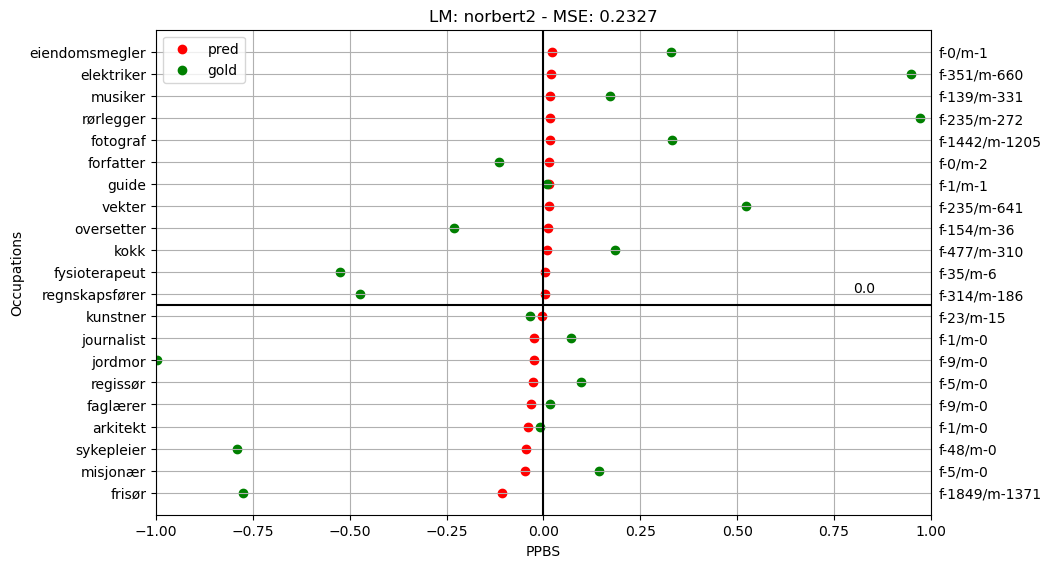

In [31]:
data = readData("data/filtered/norbert2Filtered_occ.csv") # read data from file
plotdata(data, "norbert2") # Plot the data
plt.show()

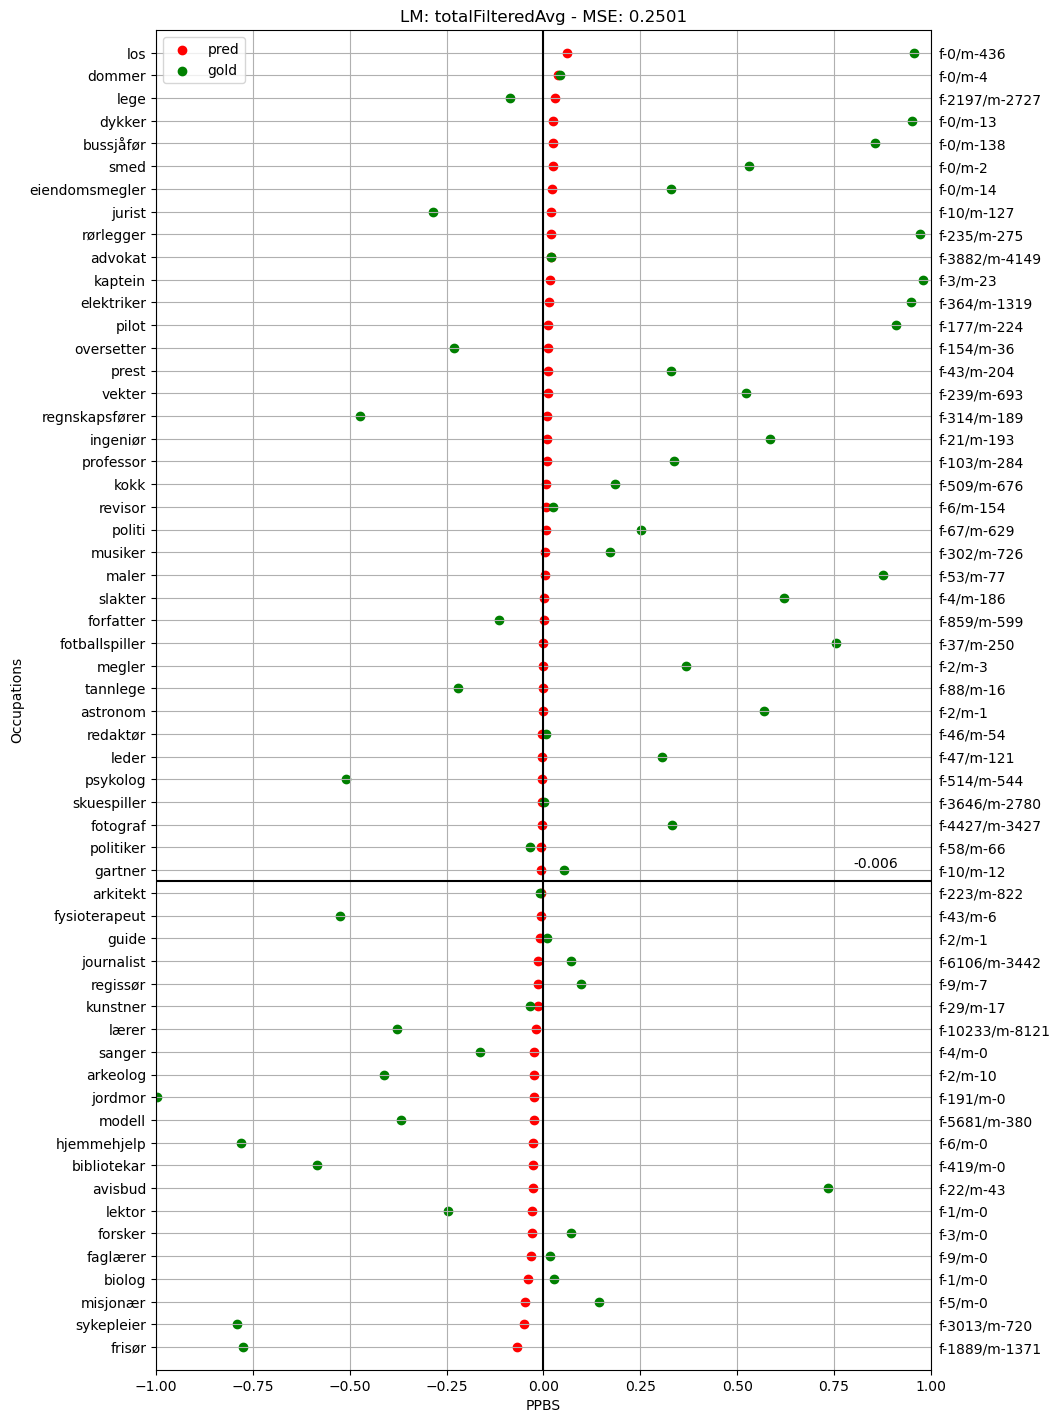

In [8]:
data = readData("data/total/totalFiltered_occ.csv") # read data from file
plotdata(data, "totalFilteredAvg") # Plot the data
plt.show()

In [10]:
def plotdata2(data,name):
    data = data[::-1]
    atts = [x[0] for x in data]
    counts = [x[1] for x in data]
    yGold = [x[2] for x in data]
    yPred = [x[3] for x in data]
    x_positions = range(len(atts))
    
    plt.figure(figsize=(15,5))
    plt.scatter(x_positions, yGold, color='green', label='gold')
    plt.scatter(x_positions, yPred, color='red', label='pred')
    
    # # Customize the y-axis to show only labels
    plt.ylim(-1,1)  
    plt.xticks(ticks=x_positions, labels=atts,rotation=90)
    plt.xlim(-1,len(atts))  
    
    # # Add labels, title, and legend
    plt.ylabel('PPBS', fontsize=20)
    plt.xlabel('Occupation', fontsize=20)
    plt.text(-1,1.4, f"{name}", fontsize=20)
    plt.text(len(atts),1.4, f"MSE: {mean_squared_error(yGold,yPred):0.4f}", fontsize=20, ha="right")
    plt.text(len(atts)/2-0.5,1.4, "Count", fontsize=20, ha='center')
    
    plt.legend()
    for x, att in enumerate(atts):
        plt.text(x-0.1, 1.1, counts[x], fontsize=10, rotation=90)
    # grid
    plt.grid()
    plt.axhline(color='black')
    middle = findMiddle(yGold)
    plt.axvline(x=middle, color='black')
    plt.text(middle-(len(atts)/50),-0.9, f"{round((yPred[int(middle + 0.5)] + yPred[int(middle - 0.5)])/2,3)}",rotation=90, fontsize=12)

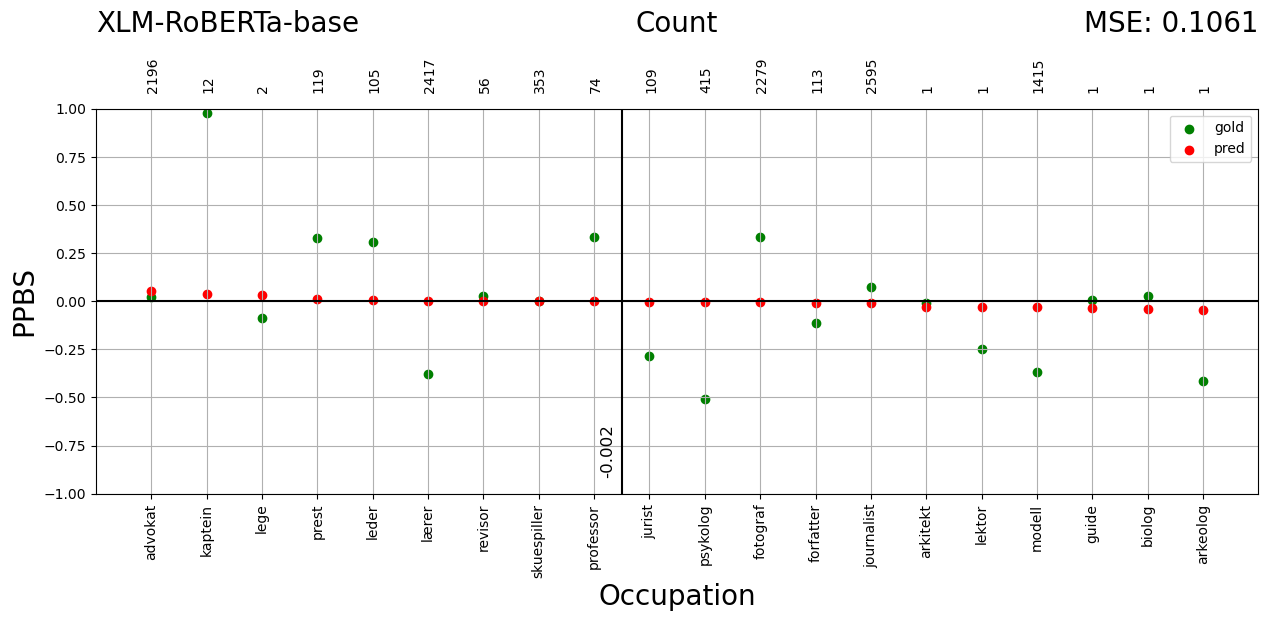

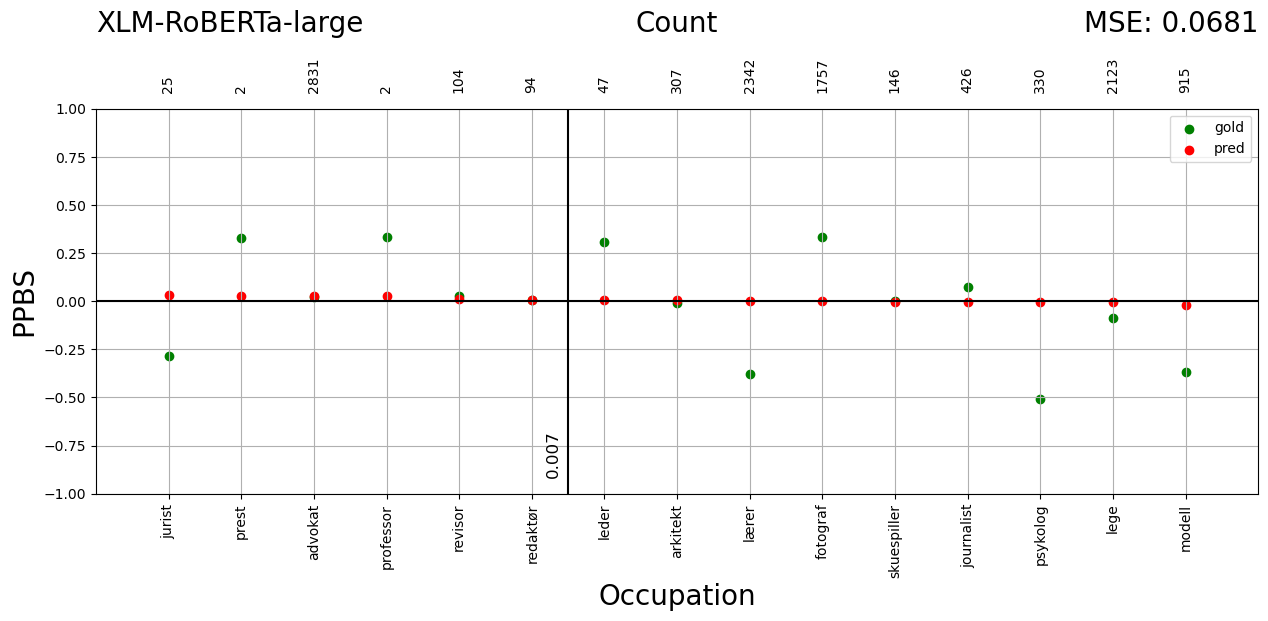

In [15]:
data = readData("data/filtered/xlmRBaseFiltered_occ.csv",gather=True) # read data from file
plotdata2(data, "XLM-RoBERTa-base") # Plot the data
plt.show()

data = readData("data/filtered/xlmRLargeFiltered_occ.csv",gather=True) # read data from file
plotdata2(data, "XLM-RoBERTa-large") # Plot the data
plt.show()

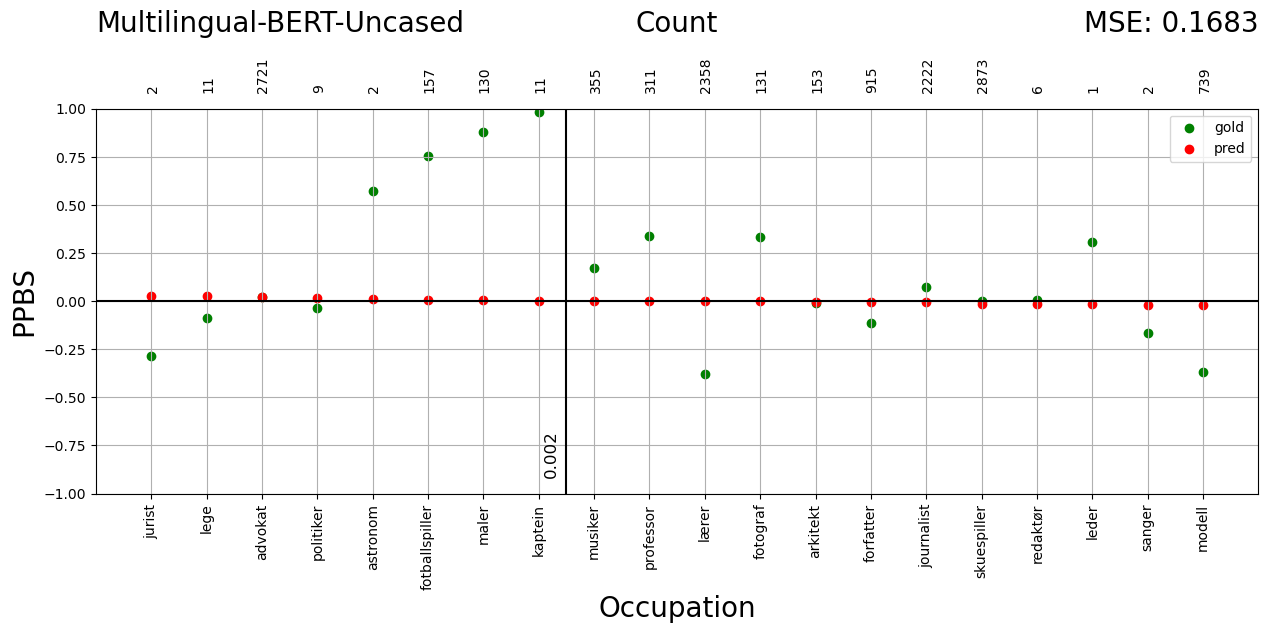

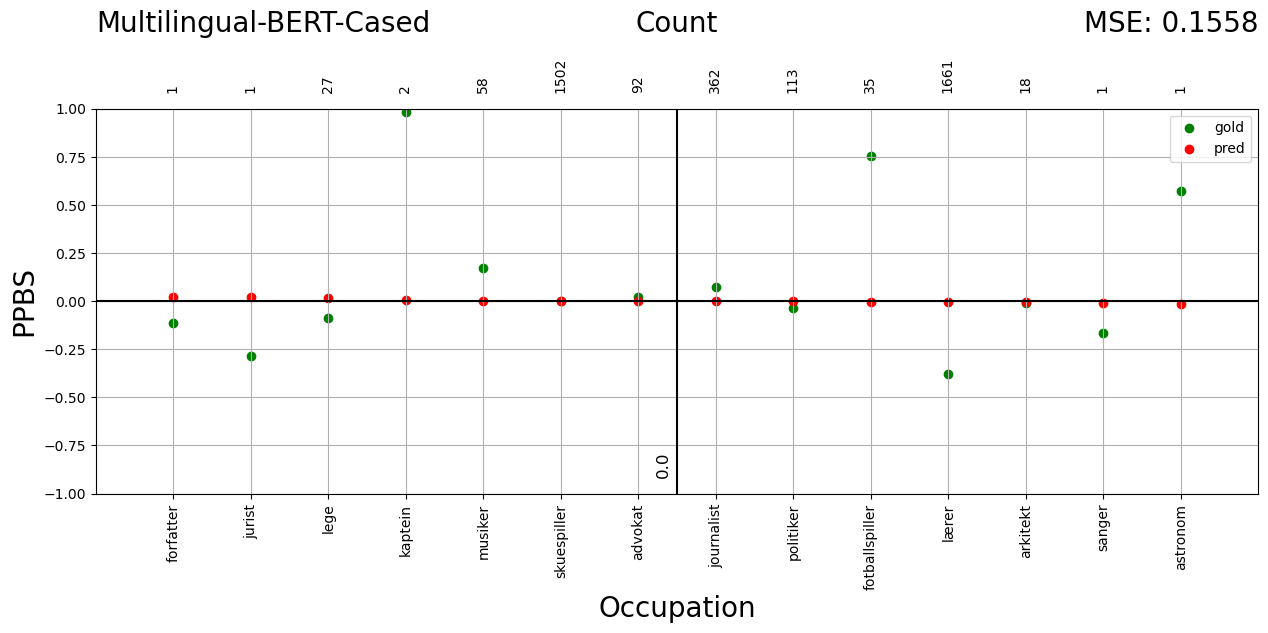

In [17]:
data = readData("data/filtered/mBertUncasedFiltered_occ.csv",gather=True) # read data from file
plotdata2(data, "Multilingual-BERT-Uncased") # Plot the data
plt.show()

data = readData("data/filtered/mBertCasedFiltered_occ.csv",gather=True) # read data from file
plotdata2(data, "Multilingual-BERT-Cased") # Plot the data
plt.show()

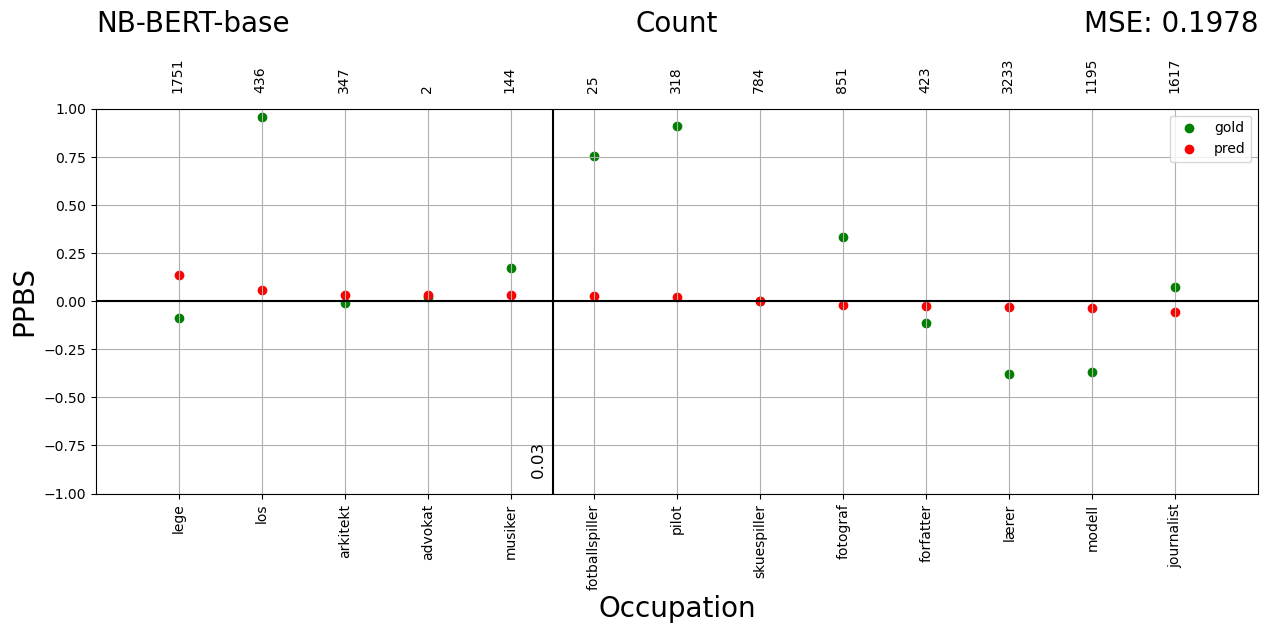

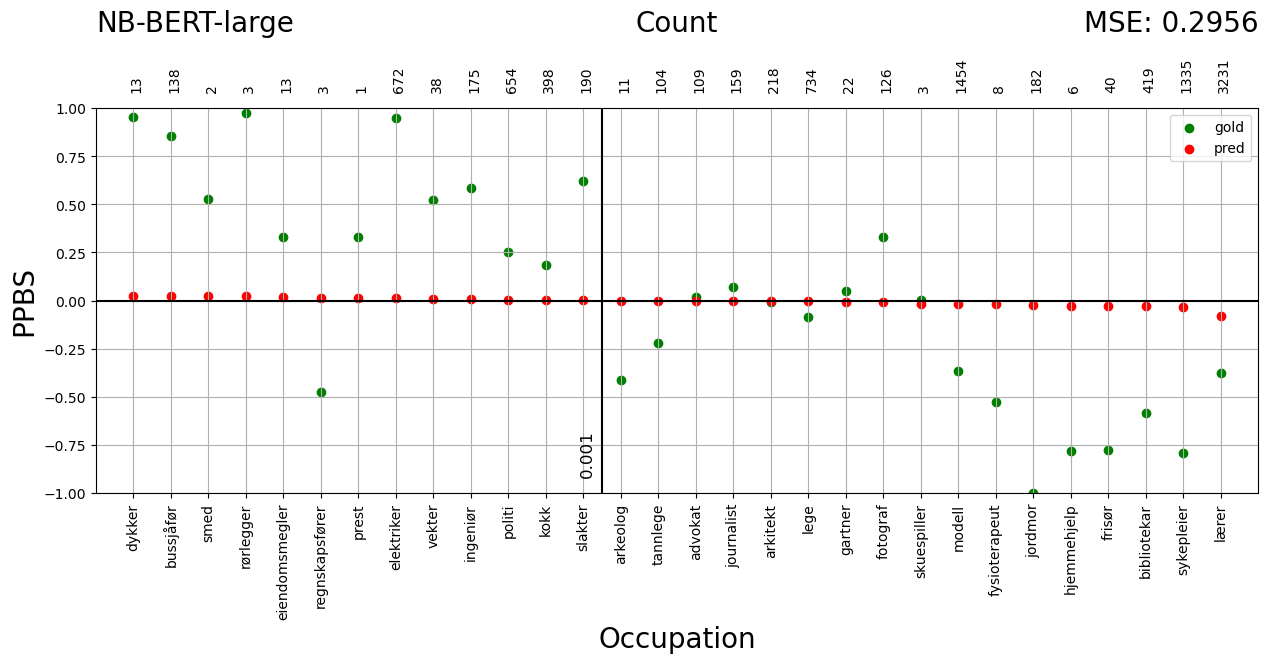

In [19]:
data = readData("data/filtered/nbBertBaseFiltered_occ.csv",gather=True) # read data from file
plotdata2(data, "NB-BERT-base") # Plot the data
plt.show()

data = readData("data/filtered/nbBertLargeFiltered_occ.csv",gather=True) # read data from file
plotdata2(data, "NB-BERT-large") # Plot the data
plt.show()

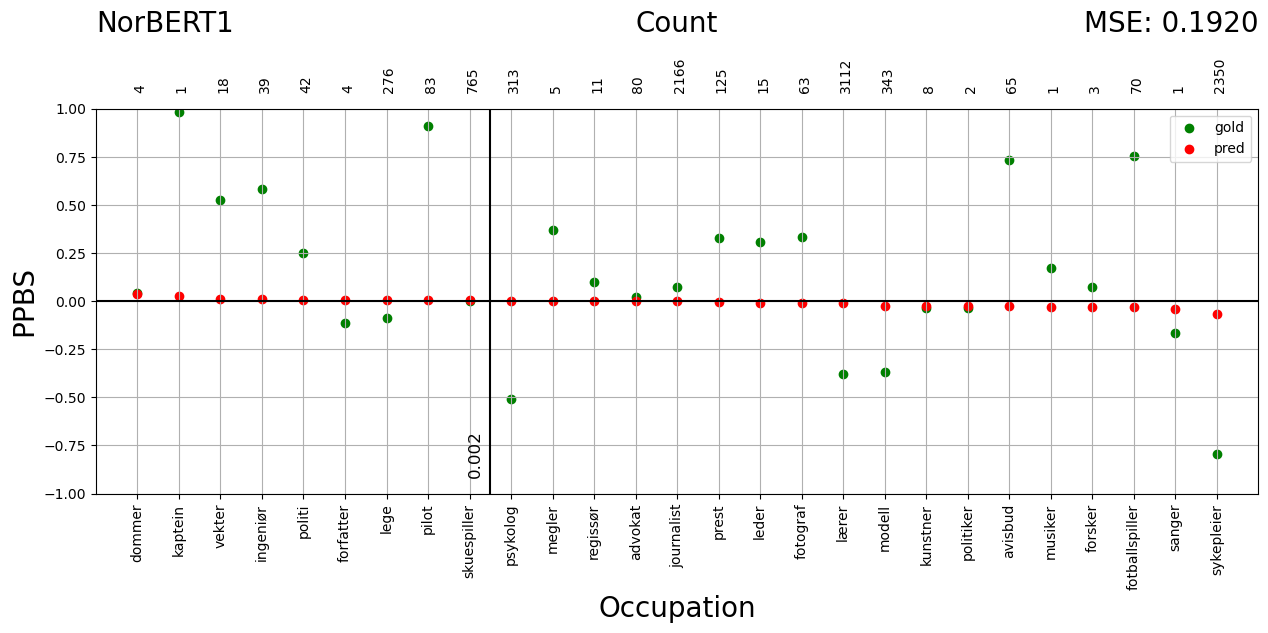

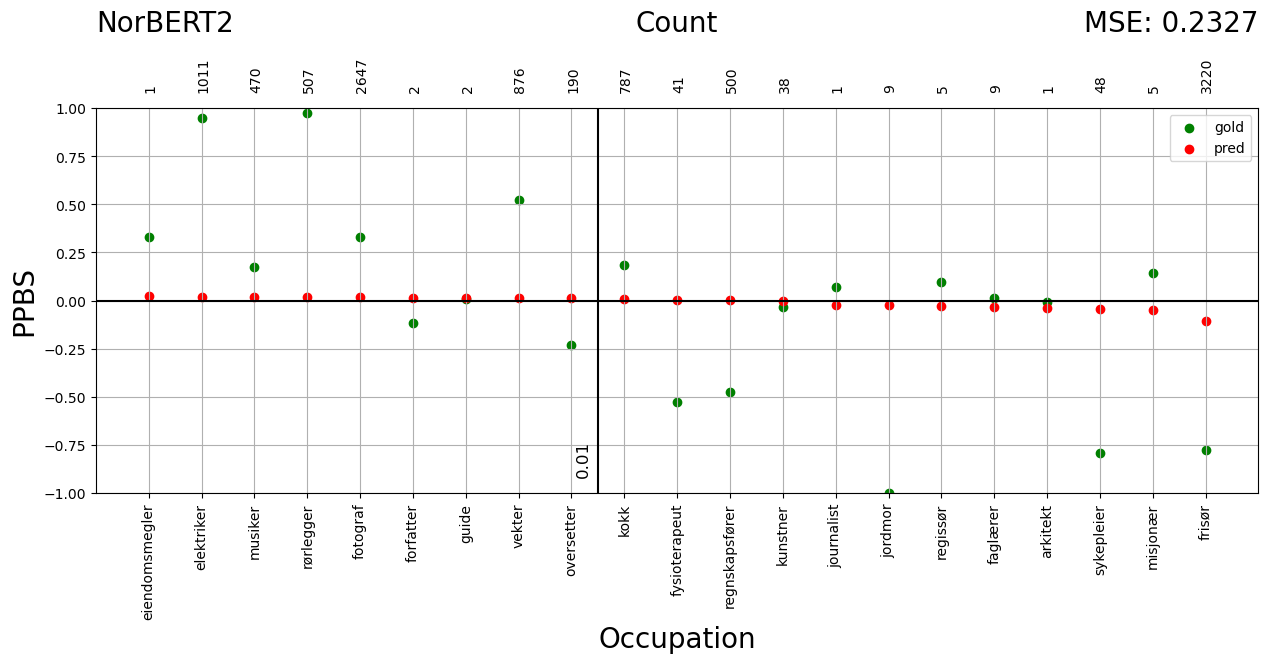

In [21]:
data = readData("data/filtered/norbertFiltered_occ.csv",gather=True) # read data from file
plotdata2(data, "NorBERT1") # Plot the data
plt.show()

data = readData("data/filtered/norbert2Filtered_occ.csv",gather=True) # read data from file
plotdata2(data, "NorBERT2") # Plot the data
plt.show()

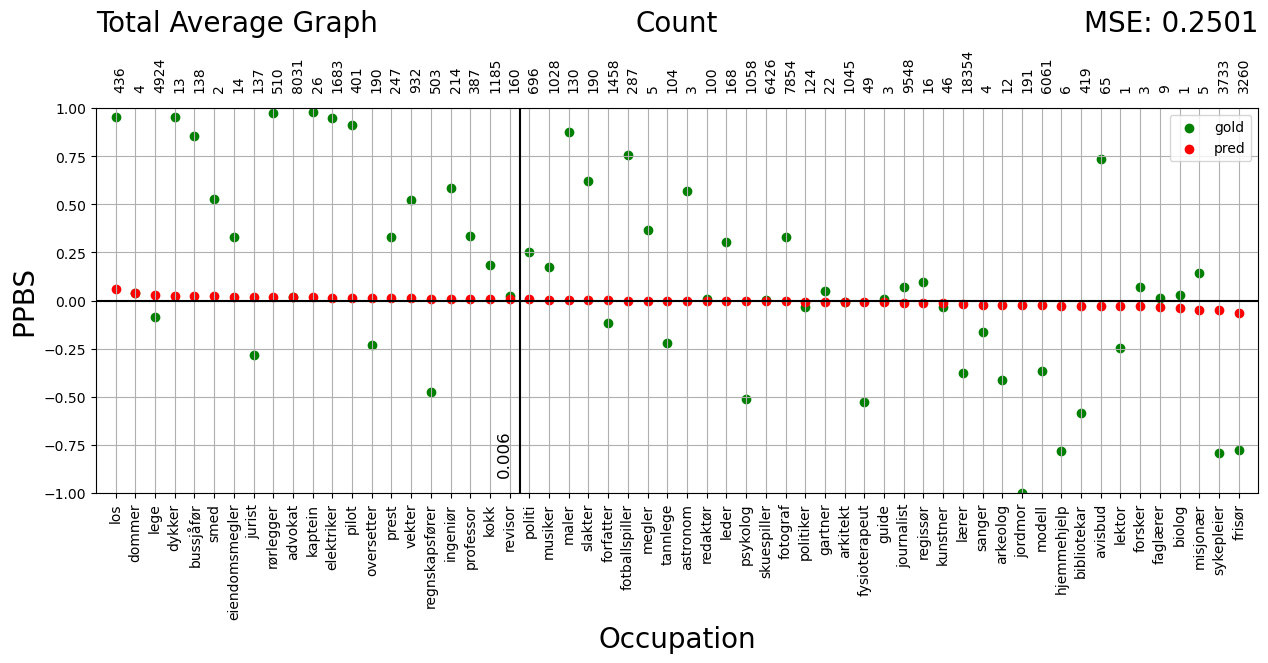

In [23]:
data = readData("data/total/totalFiltered_occ.csv",gather=True) # read data from file
plotdata2(data, "Total Average Graph") # Plot the data
plt.show()

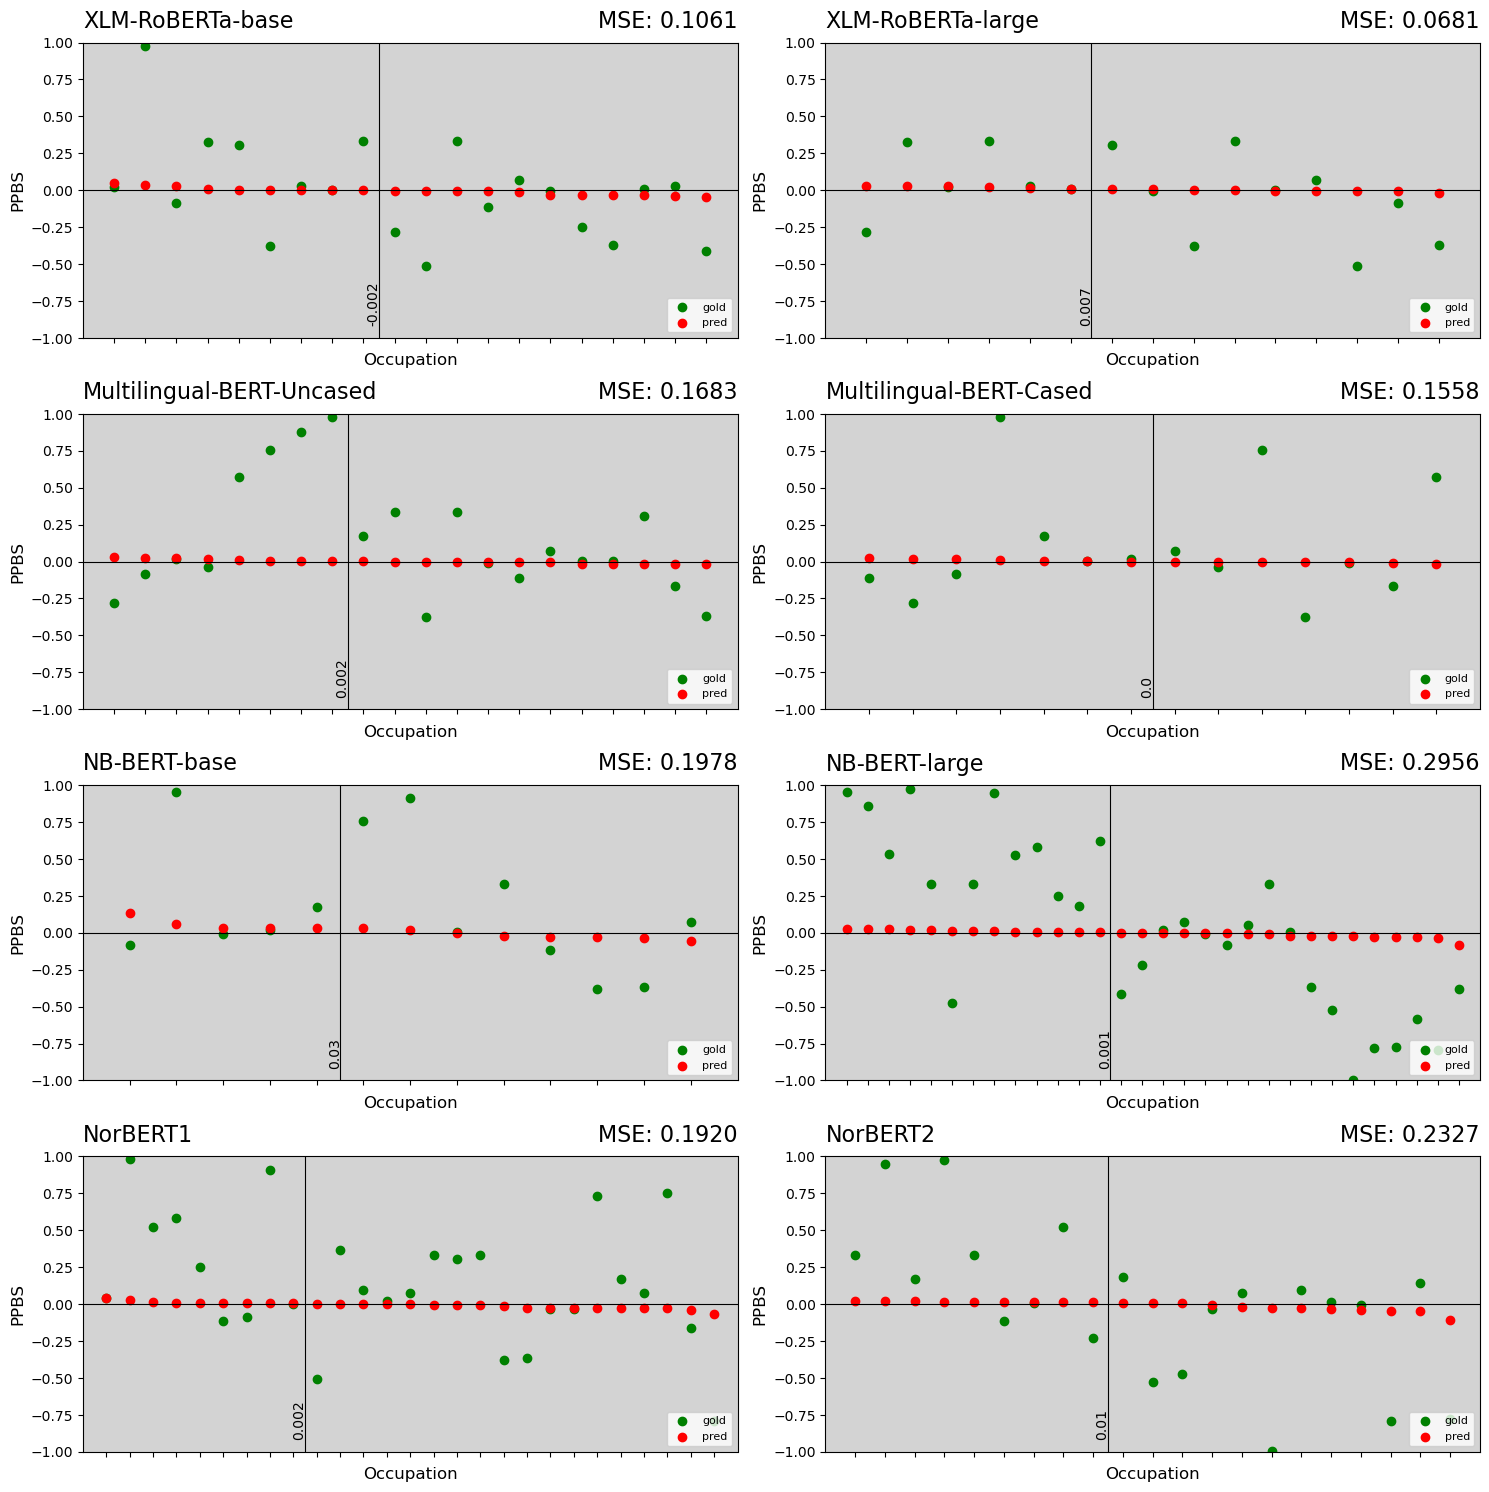

In [24]:
def plotdata3(ax, data, name):
    data = data[::-1]
    atts = [x[0] for x in data]
    counts = [x[1] for x in data]
    yGold = [x[2] for x in data]
    yPred = [x[3] for x in data]
    x_positions = range(len(atts))

    ax.scatter(x_positions, yGold, color='green', label='gold')
    ax.scatter(x_positions, yPred, color='red', label='pred')

    ax.set_ylim(-1, 1)
    ax.set_xlim(-1, len(atts))
    ax.set_xticks(x_positions)
    ax.set_xticklabels(["" for _ in atts])
    # ax.set_xticklabels(atts, rotation=90, fontsize=8)
    ax.set_ylabel('PPBS', fontsize=12)                      #PPBS
    ax.set_xlabel('Occupation', fontsize=12)                #OCC

    # Title and metrics
    ax.text(-1, 1.1, f"{name}", fontsize=16)                                                                  #NAME
    ax.text(len(atts), 1.1, f"MSE: {mean_squared_error(yGold, yPred):0.4f}", fontsize=16, ha="right")         #MSE

    # Count labels
    # for x, att in enumerate(atts):
    #     ax.text(x - 0.1, 1.05, counts[x], fontsize=6, rotation=90)
    ax.legend(fontsize=8, loc='lower right')
    # Grid + lines
    ax.set_facecolor("#D3D3D3")
    # ax.grid(True, linestyle='--', alpha=0.5)
    ax.axhline(color='black', linewidth=0.8)
    middle = findMiddle(yGold)
    ax.axvline(x=middle, color='black', linewidth=0.8)
    ax.text(middle - (len(atts)/50), -0.9, 
            f"{round((yPred[int(middle + 0.5)] + yPred[int(middle - 0.5)]) / 2, 3)}",
            rotation=90, fontsize=10)

paths = [
    "data/filtered/xlmRBaseFiltered_occ.csv",
    "data/filtered/xlmRLargeFiltered_occ.csv",
    "data/filtered/mBertUncasedFiltered_occ.csv",
    "data/filtered/mBertCasedFiltered_occ.csv",
    "data/filtered/nbBertBaseFiltered_occ.csv",
    "data/filtered/nbBertLargeFiltered_occ.csv",
    "data/filtered/norbertFiltered_occ.csv",
    "data/filtered/norbert2Filtered_occ.csv"
]

names = [
    "XLM-RoBERTa-base", "XLM-RoBERTa-large", "Multilingual-BERT-Uncased", "Multilingual-BERT-Cased",
    "NB-BERT-base", "NB-BERT-large", "NorBERT1", "NorBERT2"
]


# Create a 4x2 grid of plots
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
axes = axes.flatten()

for i, (path, name) in enumerate(zip(paths, names)):
    try:
        data = readData(path)
        plotdata3(axes[i], data, name)
    except Exception as e:
        axes[i].text(0.5, 0.5, f"Error loading {name}\n{e}", ha='center', va='center')
        axes[i].axis('off')

plt.tight_layout()
plt.show()